Cho một tập dữ liệu văn bản
- Đếm số lần xuất hiện của mỗi từ.
- Đếm tổng số từ.
- Liệt kê top k từ xuất hiện nhiều nhất.
- Sử dụng thư viện Matplotlib vẽ biểu đồ cột (bar chart) biểu diễn số lượng của 50 từ
xuất hiện nhiều nhất trong tập dữ liệu.

In [1]:
from pyspark import SparkContext

# create Spark context with necessary configuration
sc = SparkContext("local", "Text processing with PySpark Example")

# read data from text file into lines  


23/06/08 09:14:28 WARN Utils: Your hostname, hdoop-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/06/08 09:14:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/08 09:14:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:

lines = sc.textFile("/home/hdoop/labs/datasets/gutenberg")
import re
words = lines.flatMap(lambda line: re.findall(r"\w+", line))

# count the occurrence of each word
wordFrequencies = list(words.map(lambda word: (word, 1)).reduceByKey(lambda a,b: a + b).collect())

In [4]:
print(wordFrequencies[:20])
print('.....................')
print(wordFrequencies[-20:])
print(f'Tong so tu {len(wordFrequencies)}')

[('by', 3925), ('in', 12135), ('laws', 44), ('changing', 14), ('the', 42361), ('world', 292), ('Be', 26), ('check', 15), ('for', 3462), ('country', 93), ('downloading', 3), ('or', 2481), ('any', 717), ('This', 528), ('be', 3623), ('thing', 364), ('viewing', 5), ('file', 18), ('do', 723), ('edit', 1)]
.....................
[('rotated', 1), ('_Worlds', 1), ('Making_', 1), ('JAMES', 1), ('Tides_', 1), ('HOLMAN', 1), ('Addresses_', 1), ('_Constitution', 1), ('NORMAN', 1), ('_Inorganic', 1), ('OLIVER', 1), ('Space_', 1), ('PERRIN', 1), ('_Brownian', 1), ('THOMPSON', 1), ('SILVANUS', 1), ('Visible', 1), ('fundraising', 1), ('Melan', 1), ('99712', 1)]
Tong so tu 51273


In [7]:
# In ra top k từ xuất hiện nhiều nhất: 
k=10
topFrequentWords = list(sorted(wordFrequencies, key = lambda x: -x[1]))[:k]
print(*topFrequentWords)

('the', 42361) ('of', 24072) ('and', 17207) ('a', 12221) ('to', 12208) ('in', 12135) ('is', 7709) ('that', 6545) ('it', 6031) ('with', 4734)


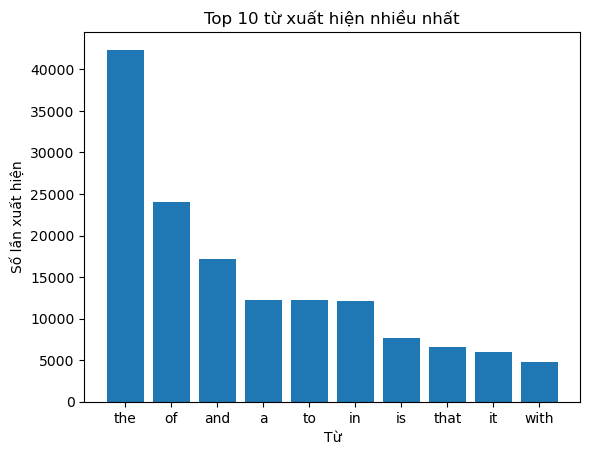

In [8]:
import matplotlib.pyplot as plt

# Tạo danh sách các từ và số lần xuất hiện của chúng
words = [word[0] for word in topFrequentWords]
frequencies = [word[1] for word in topFrequentWords]

# Vẽ biểu đồ cột cho các từ và số lần xuất hiện của chúng
plt.bar(words, frequencies)
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title(f'Top {k} từ xuất hiện nhiều nhất')
plt.show()